In [238]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [239]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

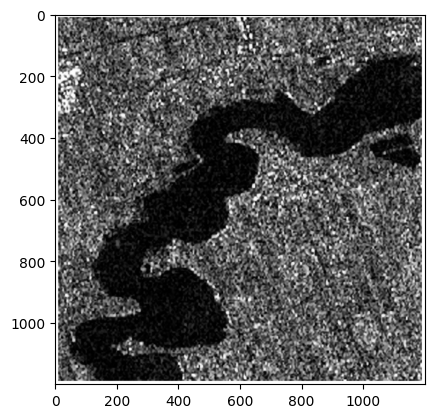

In [240]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [241]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

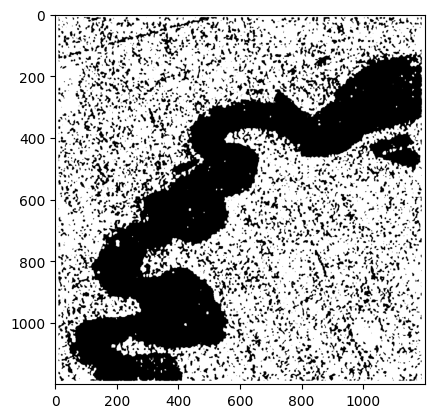

In [242]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [243]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

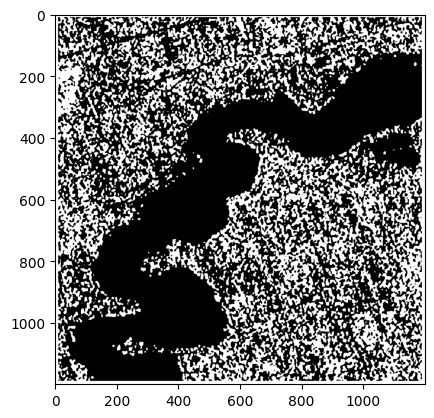

In [244]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [245]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


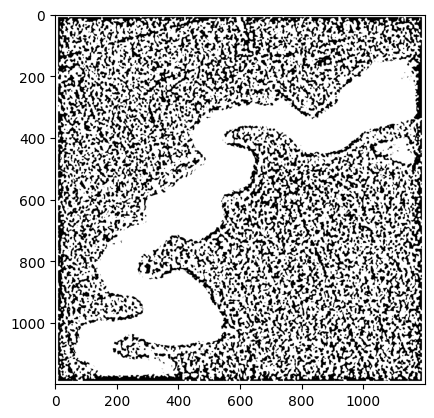

In [246]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [247]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

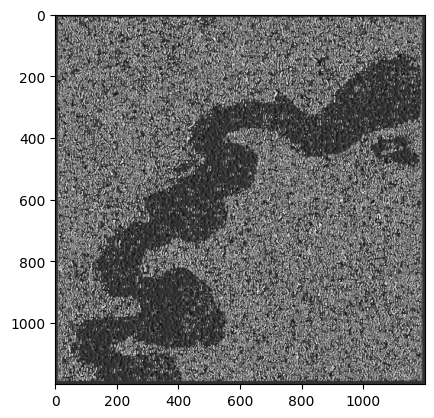

In [248]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

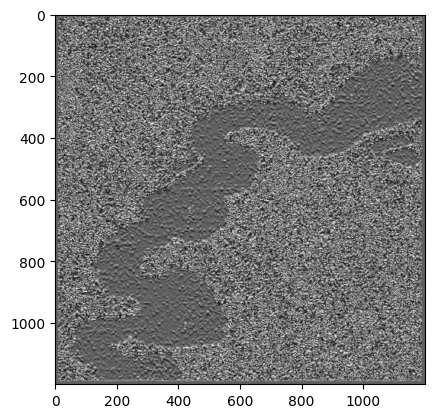

In [249]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [250]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

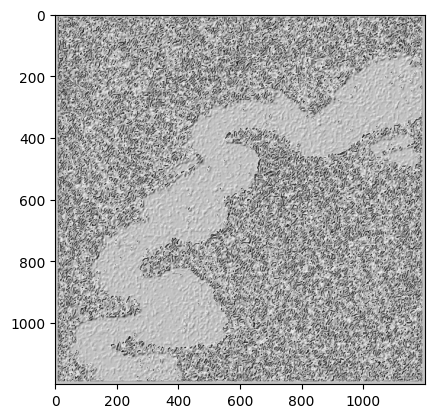

In [251]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [252]:
edges = cv2.Canny(image_gray,100,200)

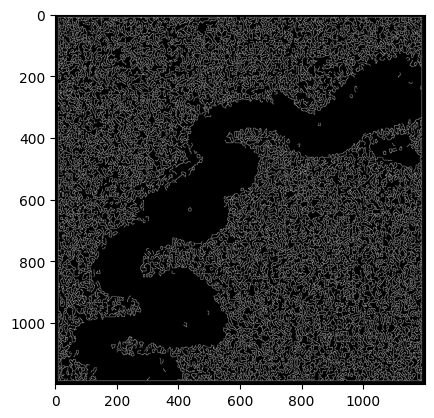

In [253]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [254]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

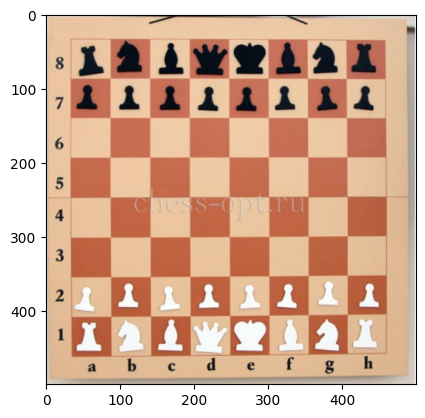

In [255]:
plt.imshow(image)

In [256]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

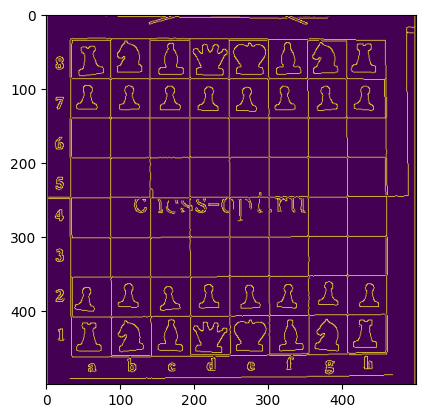

In [257]:
plt.imshow(canny)

In [258]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [259]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

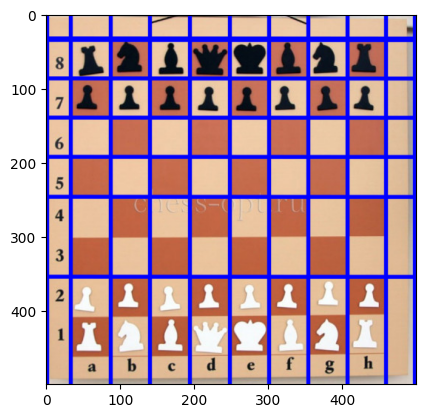

In [260]:
plt.imshow(image)

In [261]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [262]:
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)

In [263]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [264]:
image = cv2.imread('sar_3.jpg', cv2.IMREAD_GRAYSCALE) 

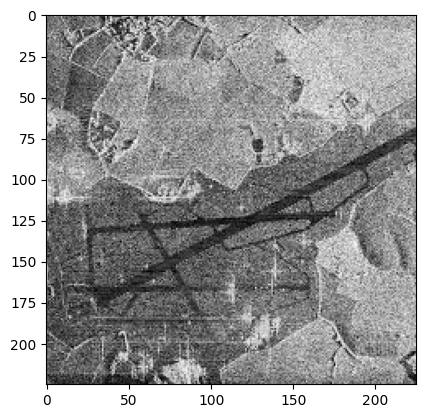

In [265]:
plt.imshow(image, cmap="gray")

In [266]:
# 2. Улучшение контраста для SAR изображения
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_enhanced = clahe.apply(image)

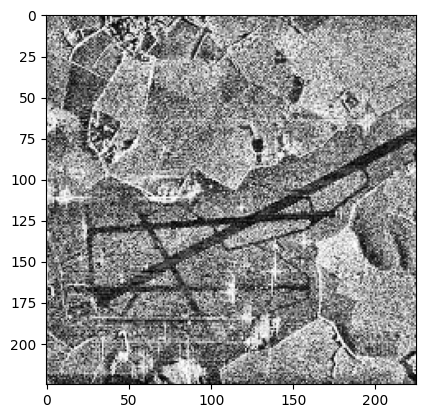

In [267]:
plt.imshow(img_enhanced, cmap="gray")

In [268]:
# 3. Фильтрация для подавления шума (важно для SAR)
img_filtered = cv2.medianBlur(img_enhanced, 5)

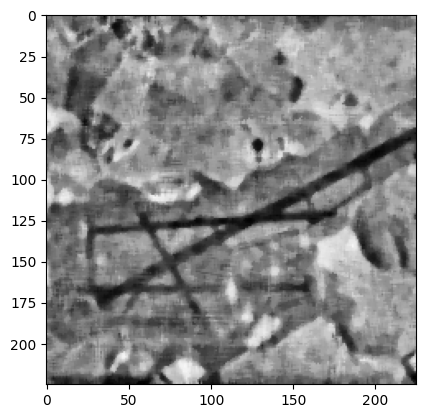

In [269]:
plt.imshow(img_filtered, cmap="gray")

In [270]:
# 4. Выделение границ (Canny лучше подходит для SAR)
canny = cv2.Canny(img_filtered, 50, 150, apertureSize=3)

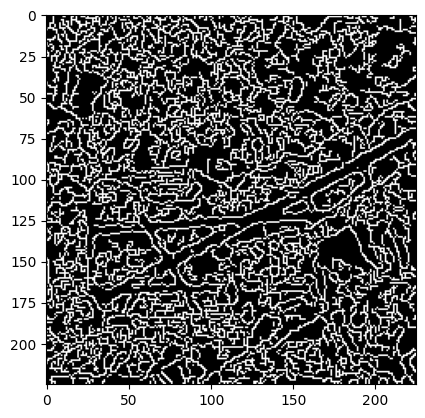

In [304]:
plt.imshow(canny, cmap="gray")

In [339]:
 # 5. Применение преобразования Хафа для линий
lines = cv2.HoughLinesP(canny, 
                           rho=1, 
                           theta=np.pi/180, 
                           threshold=130, 
                           minLineLength=50, 
                           maxLineGap=10)

In [340]:
# 6. Поиск самой длинной линии
longest_line = None
max_length = 0
    
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            
        if length > max_length:
            max_length = length
            longest_line = line[0]

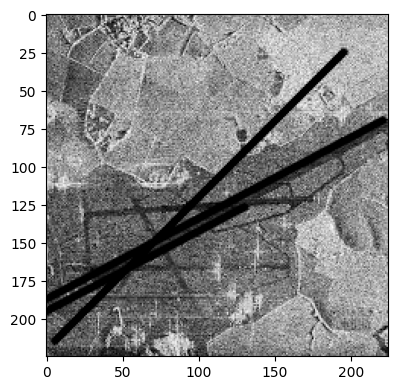

In [341]:
result = image.copy()
    
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0] 
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 3, cv2.LINE_AA)
        
# Отображение результатов
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [342]:
if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(result_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    print(f"Длина самой протяженной линии: {max_length:.2f} пикселей")

Длина самой протяженной линии: 270.11 пикселей


In [343]:
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [344]:
# точечная бинаризация
import copy

bin_img = copy.deepcopy(image)
T  = 50
bin_img[image < T] = 0
bin_img[image >= T] = 255

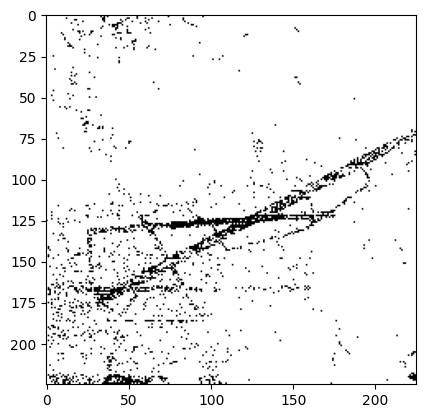

In [345]:
plt.imshow(bin_img, cmap="gray")

In [346]:
# otsu binarization
_,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

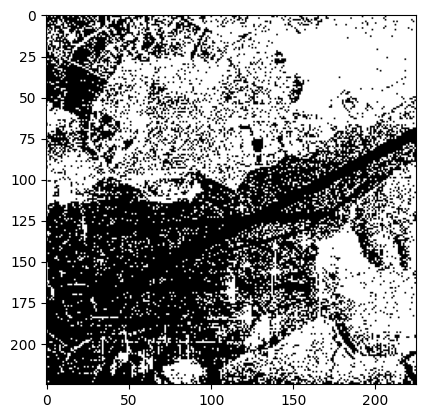

In [347]:
plt.imshow(th2, cmap="gray")

In [348]:
# адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

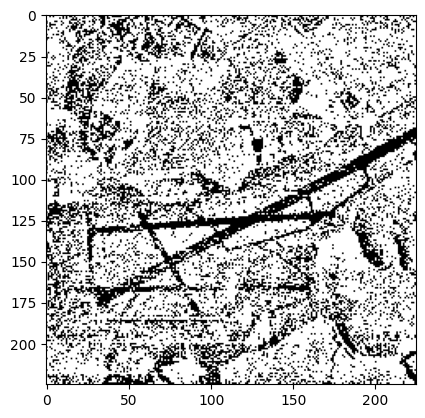

In [349]:
plt.imshow(th3, cmap="gray")

In [350]:
# Объединяем результаты (логическое ИЛИ)
combined_binary = cv2.bitwise_or(bin_img, th2)
combined_binary = cv2.bitwise_or(combined_binary, th3)

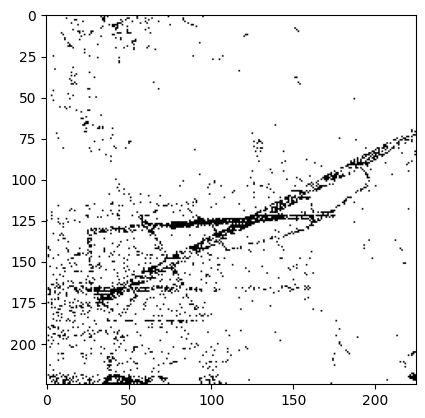

In [351]:
plt.imshow(combined_binary, cmap="gray")

In [375]:
inverted_binary = cv2.bitwise_not(combined_binary)
contours, _ = cv2.findContours(inverted_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_sorted = sorted(contours, key=cv2.contourArea, reverse=True)

num_contours_to_keep = 50  
large_contours = contours_sorted[:num_contours_to_keep]
road_mask = np.zeros_like(inverted_binary)
cv2.fillPoly(road_mask, large_contours, 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(225, 225), dtype=uint8)

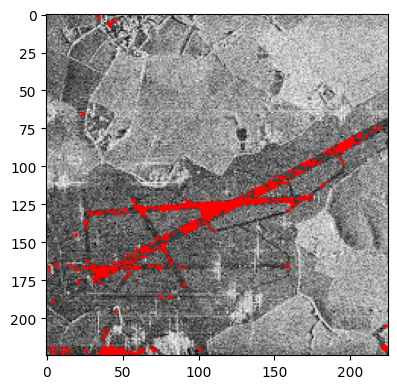

In [377]:
plt.figure(figsize=(12, 4))

original = cv2.imread('sar_3.jpg', cv2.IMREAD_GRAYSCALE) 
original_with_road = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
original_with_road[road_mask == 255] = [0, 0, 255]  
plt.imshow(cv2.cvtColor(original_with_road, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()